In [4]:
import pickle
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
with open('train.pickle', 'rb') as r:
    train = pickle.load(r)
with open('test.pickle', 'rb') as r:
    test = pickle.load(r)

features = [f for f in train if f not in ['air_store_id', 'visit_date', 'visitors']]
train_size = int(len(train)*0.7)
test_size = len(train) - train_size
input_train = train[features][0:train_size]
input_test = train[features][train_size:len(train)]
train_visitors = train.visitors.values[0:train_size]
test_visitors = train.visitors.values[train_size:len(train)]

error = []
for i in range(1,42):
    regr = RandomForestRegressor(n_estimators=i)
    regr.fit(input_train, train_visitors)
    pred_rfr = regr.predict(input_test)
    error.append(mean_squared_error(test_visitors, pred_rfr))

In [5]:
for i in range(0, len(tree_error)):
    if(tree_error[i] == min(tree_error)):
        idx = i
print(i)

40


In [5]:
with open('tree_error_selection.pickle', 'wb') as w:
    pickle.dump(error, w)

In [6]:
min(error)

105.73844981399075

In [7]:
regr = RandomForestRegressor(n_estimators=34)
regr.fit(input_train, train_visitors)
pred_rfr = regr.predict(input_test)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
mean_squared_error(test_visitors, pred_rfr)  # 30

In [ ]:
trueV, = plt.plot(test_visitors[0:100])
predV, = plt.plot(pred_rfr[0:100])
plt.xlabel('time')
plt.ylabel('visitors')
plt.legend([trueV, predV], ['true values', 'predictions'])
plt.show()

In [8]:
with open('rfr_test_tree34.pickle', 'wb') as w:
    pickle.dump(pred_rfr, w)

In [ ]:
import csv
test['visitors'] = pred_rfr
sub_rfr2 = test[['id', 'visitors']].copy()
sub_rfr2.to_csv('sub_rfr2_tree34.csv', index=False)

In [1]:
import pickle
with open('tree_error_selection.pickle', 'rb') as r:
    tree_error = pickle.load(r)

In [2]:
min_error = min(tree_error)

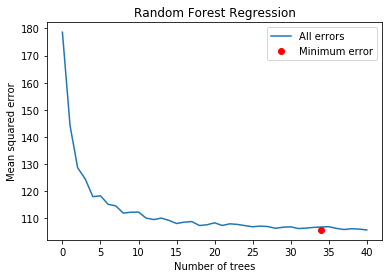

In [4]:
import matplotlib.pyplot as plt
all_tree, =plt.plot(tree_error)
min_tree, = plt.plot(34, min_error, 'ro')
plt.xlabel('Number of trees')
plt.ylabel('Mean squared error')
plt.title('Random Forest Regression')
plt.legend([all_tree, min_tree], ['All errors', 'Minimum error'], loc='upper right')
plt.savefig('randomForest.png')
plt.show()